In [171]:
#1. Problem statements. 
#Load the data (It should have at least 100 rows.) and get familiar with it. 

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

df = pd.read_csv('one-person-households.csv')
df

,Entity,Code,Year,Share of one person households
0,Afghanistan,AFG,2015,0.189425
1,Albania,ALB,2011,8.274421
2,Angola,AGO,2007,4.082942
3,Angola,AGO,2011,6.603705
4,Angola,AGO,2016,10.813146
...,...,...,...,...
982,Zimbabwe,ZWE,1994,13.498573
983,Zimbabwe,ZWE,1999,15.561739
984,Zimbabwe,ZWE,2005,10.155535
985,Zimbabwe,ZWE,2010,11.660686


Describe the data source and include its link: 
https://www.kaggle.com/datasets/arashnic/loneliness-and-social-connections?resource=download

1b. List out three questions you want to investigate from this dataset. These questions could be a trend, a comparison
between different groups of a categorical feature, a relationship between two variables, or a distribution of a numerical
variable. 

1. Which country has the highest and lowest share of one person households given the most recent year?
2. Has the share of one person households increased or decreased over the years in the US? 
3. How would you compare the US to the two countries?

#2. Data cleaning. 
Follow the data cleaning steps to clean the data. a. Drop any unwanted feature if necessary. b. Address any missing values.
c. Remove duplicates if necessary. d. Check the data type of each column. e. For categorical variables, check if there are
any inconsistent inputs. f. For numeric variables, check any outliers.

-No features to drop.
-No missing values.
-No duplicates.
-Checked the data type of each column.
-No inconsistency.

In [172]:
#Check the data type of each column.
print(df['Entity'].dtype)
print(df['Code'].dtype)
print(df['Year'].dtype)
print(df['Share of one person households'].dtype)

object
object
int64
float64


In [173]:
#Check for any outliers.
print(df['Share of one person households'].value_counts(dropna=False))

20.800000    12
29.300000    10
28.900000     8
24.600000     8
25.700000     8
             ..
17.058793     1
29.500000     1
27.400000     1
7.817784      1
12.373476     1
Name: Share of one person households, Length: 728, dtype: int64


<AxesSubplot:>

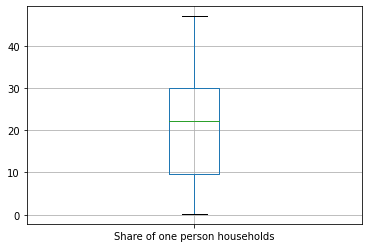

In [174]:
df.boxplot(column=['Share of one person households'])

3. Exploratory data Analysis and Interpretation of the results. 
Question A: ****:
        a. Process the data. Generate the result you want.
        b. Create a graph to visualize the result. 
        c. Interpret the result. Explain your findings. 

In [175]:
#Which country has the highest and lowest share of one person households given the most recent year?

hi_low = df[['Entity','Year', 'Share of one person households']]
hi_low_year = hi_low.loc[hi_low['Year'] == 2018]
hi_low_year

,Entity,Year,Share of one person households
32,Austria,2018,37.200000
59,Belgium,2018,34.700000
94,Bulgaria,2018,33.300000
152,Croatia,2018,24.400000
167,Cyprus,2018,20.800000
181,Czechia,2018,28.700000
199,Denmark,2018,44.100000
238,Estonia,2018,40.300000
251,European Union (28 countries),2018,33.000000
271,Finland,2018,43.000000


In [176]:
high = hi_low_year.sort_values(by='Share of one person households',ascending=False)
high

,Entity,Year,Share of one person households
634,Norway,2018,45.800000
199,Denmark,2018,44.100000
271,Finland,2018,43.000000
808,Sweden,2018,42.500000
319,Germany,2018,41.700000
238,Estonia,2018,40.300000
591,Netherlands,2018,38.300000
820,Switzerland,2018,38.100000
499,Lithuania,2018,37.700000
32,Austria,2018,37.200000


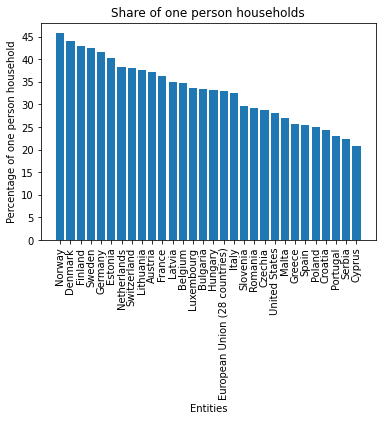

In [177]:
plt.bar(high.iloc[:,0], high.iloc[:,2])

plt.title('Share of one person households')
plt.xlabel('Entities')
plt.ylabel('Percentage of one person household')

plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 50, 5))  

plt.show()

#Explain the result.
Norway has the higest number of one person households of 45.8 percent while Cyprus has the lowest of 20.8 percent.All the
data are close to another. There are no huge differences. The difference between the highest and lowest is 25 percent.

In [178]:
#Has the share of one person households increased or decreased over the years in the US?

US_df = df[['Entity', 'Year', 'Share of one person households']]
us_household_ = US_df.loc[US_df['Entity'] == 'United States']
us_household_

,Entity,Year,Share of one person households
871,United States,1960,13.100627
872,United States,1961,13.279310
873,United States,1962,13.645825
874,United States,1963,13.571558
875,United States,1964,13.929010
876,United States,1965,15.027161
877,United States,1966,15.568606
878,United States,1967,15.531095
879,United States,1968,16.118263
880,United States,1969,16.718101


In [179]:
us_household = us_household_[43:59]
us_household

,Entity,Year,Share of one person households
914,United States,2003,26.448175
915,United States,2004,26.416071
916,United States,2005,26.589203
917,United States,2006,26.623478
918,United States,2007,26.835386
919,United States,2008,27.544249
920,United States,2009,27.015472
921,United States,2010,26.713913
922,United States,2011,27.533417
923,United States,2012,27.409071


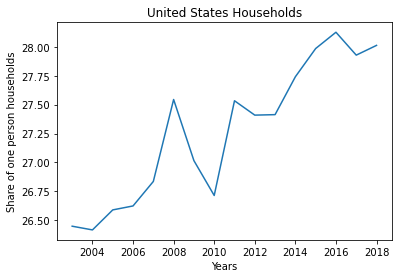

In [180]:
a = us_household['Year']
b = us_household['Share of one person households']
plt.plot(a,b)
plt.title('United States Households')
plt.xlabel('Years')
plt.ylabel('Share of one person households')
plt.show()


#Explain the result.
This line graph shows the realationship between the years and one person households. There has been a sharp drop in 2008 to 
2010, a big spike in 2010, and from then it was a steady increase up to 2018

In [181]:
#How would you compare the US to the two countries?

In [182]:
norway_household = hi_low.loc[hi_low['Entity'] == 'Norway']
norway_household

,Entity,Year,Share of one person households
619,Norway,2003,40.3
620,Norway,2004,41.1
621,Norway,2005,40.9
622,Norway,2006,43.3
623,Norway,2007,43.1
624,Norway,2008,41.1
625,Norway,2009,40.9
626,Norway,2010,41.1
627,Norway,2011,41.5
628,Norway,2012,41.2


In [183]:
cyprus_household = hi_low.loc[hi_low['Entity'] == 'Cyprus']
cyprus_household

,Entity,Year,Share of one person households
154,Cyprus,2005,16.0
155,Cyprus,2006,16.0
156,Cyprus,2007,16.0
157,Cyprus,2008,20.8
158,Cyprus,2009,20.8
159,Cyprus,2010,20.8
160,Cyprus,2011,20.8
161,Cyprus,2012,20.7
162,Cyprus,2013,20.8
163,Cyprus,2014,20.8


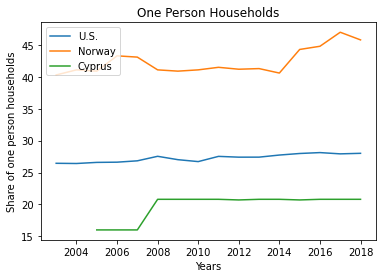

In [184]:
a = us_household['Year']
b = us_household['Share of one person households']
c = norway_household['Year']
d = norway_household['Share of one person households']
e = cyprus_household['Year']
f = cyprus_household['Share of one person households']

plt.plot(a,b,c,d,e,f)
plt.title('One Person Households')
plt.xlabel('Years')
plt.ylabel('Share of one person households')

plt.legend(['U.S.', 'Norway', 'Cyprus'],loc = 'upper left')
plt.show()

#Explain your findings.
The United States has a steady but slow growth from 2003 to 2018. Cyprus is very similar to the United States when it comes to their growth rate except the similarities does not start until 2008. Before then, there was roughly a 5 percent spike from 2007 to 2008. The two countries are not that far apart comparing their share of one person households unlike Norway. Norway is more than double of Cyprus shares, which is a drastic difference. Over the years for Norway, the percentage has gone up and down more so than the other two countries. From 2003 to 2018, Norway has only increased by 5 percent.

#4. Summary. Sumarize the main findings from this project as well as what you failed to find from the results.
#Describe what you want to further explore about the topic.

From this data, I have found that there are many people around the world living in a one person household. Norway was the
country with the highest share of 45.8 percent but if you check the data as far back as 2003, you can see there was not much
of a difference. Comparing the most recent year to the oldest, the difference in the 15 year gap is only 5.5 percent. 
Unfortunately, there was no data before 2003-2005 for multiple entities. The country with the lowest share of 20.8 percent 
as of 2018 was Cyprus. Where as Norway data started in 2003, Cyprus data started in 2005. There is not much difference 
either with percentage difference of the years though there was a big spike between 2007 and 2008 of 4.8 percent, but after 
that it stayed stagnant. For the US, the data started in 1960. The increase of one person houseoholds in the US was very
consistent. It was hard to compare Norway, Cyprus and the United States since there was not enough data for Norway and 
Cyprus. With the data I have, comparing their years starting from 2005 to 2018, Cyprus and the United States are not too far
off from each other, looking at the most recent years, unlike Norway. Norway is almost double of where the United States is.
If there was more data, I was hoping to find the growth rate/percentage differenct over the years for the three countries
to be able to perform a better comparison. What I would like to further explore in this topic is what percent are men and women, how much money are they making
compared to a two person household, and how many of the households have someone who is unemployed. When it comes to 
loneliness, there are many other things you can find out that could contribute to their loneliness, such as: How long are
they using social media?, How much money do they make?, How often do they network?, etc. 